In [1]:
# In[0.1]: Instalação dos pacotes

!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install statstests


In [6]:
# In[0.2]: Importações dos pacotes

import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matematicas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.interpolate import UnivariateSpline # curva sigmoide suavizada
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação do modelo logistico binario
from statstests.process import stepwise # procedimento Stepwise
from scipy import stats # estatistica chi2
import plotly.graph_objects as go # gráfico 3D
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.discrete.discrete_model import MNLogit # estimação do modelo
from math import exp

#logistico multinomial
import warnings
warnings.filterwarnings('ignore')



In [7]:
# In[PARTE CONCEITUAL]:
#############################################################################
#                             CURVA SIGMOIDE                                #
#############################################################################

# criada uma função Sigmóide 
# Estabelecendo uma função para a probabilidade de ocorrência de um evento

def prob(z):
    return 1 / (1 + exp(-z))



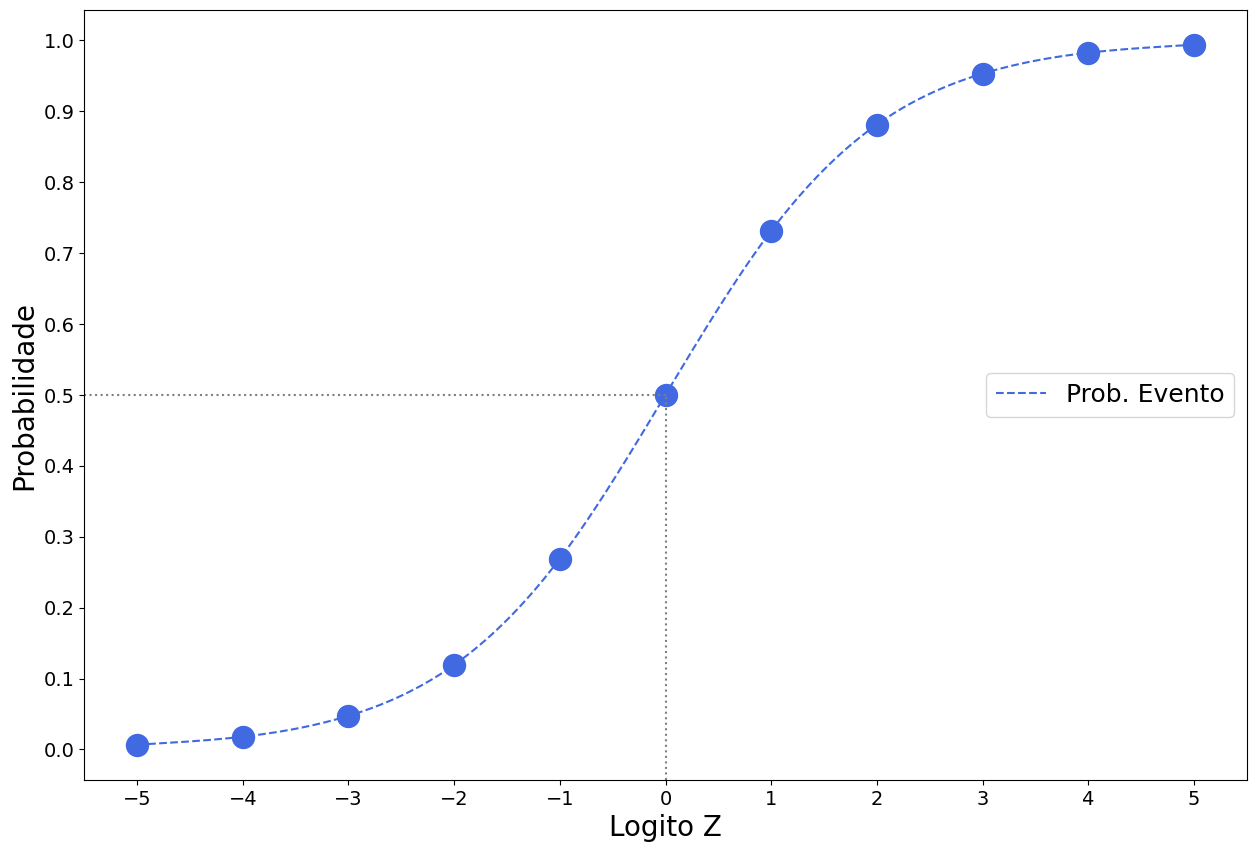

In [8]:
# In[SIGMOIDE]: Plotando a curva sigmoide teórica de ocorrência de um evento
#para um range do logito z entre -5 e +5

logitos = []
probs = []

# Criando um for de -5 a 5

for i in np.arange(-5, 6):
    logitos.append(i)
    probs.append(prob(i))
    
df = pd.DataFrame({'logito': logitos, 'probs': probs})

# InterpolaÃ§Ã£o spline (smooth probability line)
spline = UnivariateSpline(df['logito'], df['probs'], s=0)

logitos_smooth = np.linspace(df['logito'].min(), df['logito'].max(), 500)
probs_smooth = spline(logitos_smooth)

plt.figure(figsize=(15,10))
plt.plot(logitos_smooth, probs_smooth, color='royalblue',
         linestyle='--', label='Prob. Evento')
plt.scatter(df['logito'], df['probs'], color='royalblue', marker='o', s=250)
plt.axhline(y = df.probs.mean(), color = 'grey', linestyle = ':', xmax = .5)
plt.axvline(x = 0, color = 'grey', linestyle=':', ymax = 0.5)
plt.xlabel("Logito Z", fontsize=20)
plt.ylabel("Probabilidade", fontsize=20)
plt.xticks(np.arange(-5, 6), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.legend(fontsize=18, loc='center right')
plt.show()
